In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

## 2a) Theta policy

In [2]:
env = gym.make("CartPole-v1", render_mode="human", max_episode_steps=100000)
episodes = 20
theta_score = []

for episode in range(episodes):
    env.reset()
    terminated, truncated = False, False
    obs = (0, 0, 0, 0)
    score = 0

    while not terminated and not truncated:
        env.render()
        action = env.action_space.sample()

        if score == 0:
            obs, reward, terminated, truncated, info = env.step(action)
        x, v, theta, omega = obs

        # Theta policy
        if theta < 0.0:
            obs, reward, terminated, truncated, info = env.step(0)
        else:
            obs, reward, terminated, truncated, info = env.step(1)

        score += reward
    theta_score.append(score)

env.close()

## 2b) Omega policy

In [3]:
env = gym.make("CartPole-v1", render_mode="human", max_episode_steps=100000)
episodes = 20
omega_score = []

for episode in range(episodes):
    env.reset()
    terminated, truncated = False, False
    obs = (0, 0, 0, 0)
    score = 0

    while not terminated and not truncated:
        env.render()
        action = env.action_space.sample()

        if score == 0:
            obs, reward, terminated, truncated, info = env.step(action)
        x, v, theta, omega = obs

        # Omega policy
        if omega < 0.0:
            obs, reward, terminated, truncated, info = env.step(0)
        else:
            obs, reward, terminated, truncated, info = env.step(1)

        score += reward
    omega_score.append(score)

env.close()

## 2c) Plot cumulative reward of each
### Theta policy

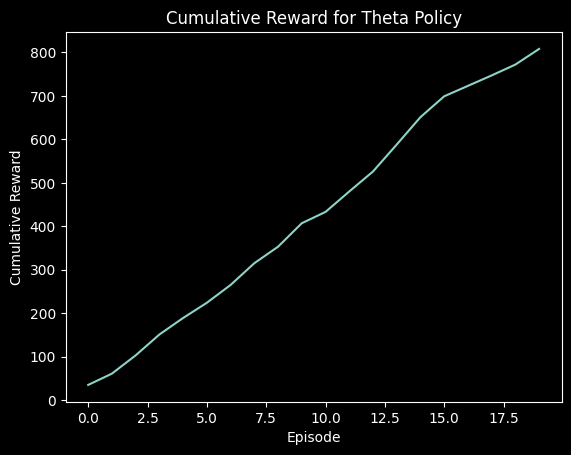

In [4]:
cumulative_reward = [sum(theta_score[:i+1]) for i in range(len(theta_score))]
plt.plot(cumulative_reward)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward for Theta Policy')
plt.show()


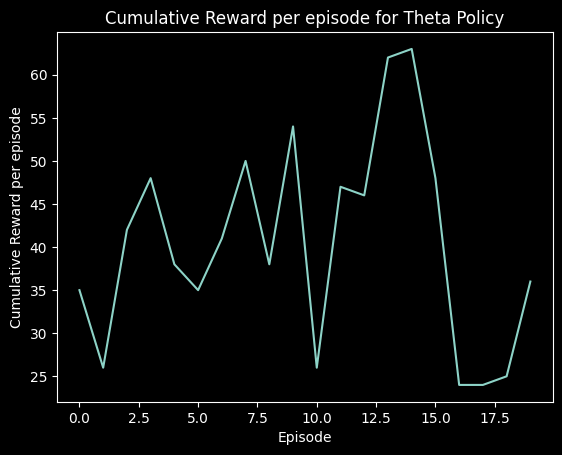

In [5]:
cumulative_reward = [theta_score[i] for i in range(len(theta_score))]
plt.plot(cumulative_reward)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward per episode')
plt.title('Cumulative Reward per episode for Theta Policy')
plt.show()

In [6]:
np.average(theta_score)

40.4

In [7]:
np.std(theta_score)

11.676472069936192

### Omega policy

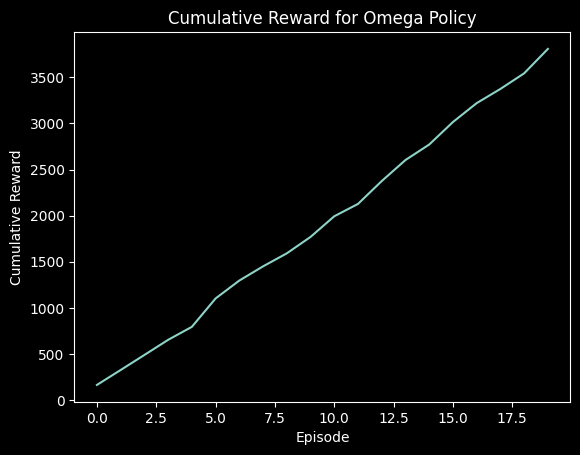

In [8]:
cumulative_reward = [sum(omega_score[:i+1]) for i in range(len(omega_score))]
plt.plot(cumulative_reward)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward for Omega Policy')
plt.show()

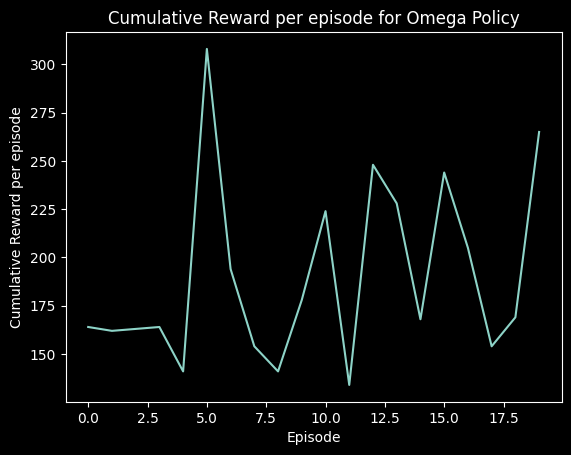

In [9]:
cumulative_reward = [omega_score[i] for i in range(len(omega_score))]
plt.plot(cumulative_reward)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward per episode')
plt.title('Cumulative Reward per episode for Omega Policy')
plt.show()

In [10]:
np.average(omega_score)

190.4

In [11]:
np.std(omega_score)

46.43856156256349

## 2d) Comment on performance

We see that the score obtained with omega policy is way higher than that with the theta policy. The averages are also higher however, the standard deviation of omega is higher than that of theta.

As to why this is seen, the theta policy focuses on angle and tries to correct this by moving to the opposite side of a particular rotation. This causes lot more instability in the agent as compared to using the omega policy which takes into account the angular velocity.